### Student Information
Name: 許暐彤 Hsu, Wei-tung

Student ID: 110061542

GitHub ID: Victoria-Wei

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [3]:
### Begin Assignment Here

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [4]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']  # 4 cate. only
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from list of text
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [5]:
X[::-1]       # print records backward

,text,category,category_name
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
...,...,...,...
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics


In [6]:
X[::2]        # print every other record

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
...,...,...,...
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med


In [7]:
X[lambda X: X.columns[2]]          # print 3rd col

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: category_name, Length: 2257, dtype: object

In [8]:
X.loc[X.index[[0, 2]], 'text']     # print 1st & 3rd records' texts

0    From: sd345@city.ac.uk (Michael Collier) Subje...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
Name: text, dtype: object

In [9]:
X.sample(n=5)                      # sample 5 records

,text,category,category_name
1325,From: marka@hcx1.ssd.csd.harris.com (Mark Ashl...,3,soc.religion.christian
1488,From: Petch@gvg47.gvg.tek.com (Chuck Petch) Su...,3,soc.religion.christian
1268,From: hudson@athena.cs.uga.edu (Paul Hudson Jr...,3,soc.religion.christian
1180,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
2108,From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...,0,alt.atheism


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

`.isnull()` returns true when there is "nothing". In our example of NA_df, id A, B, E have "nothing" for column "missing_example". While for id C, D, F, they have strings. Strings aren't considered as "nothing" in `.isnull()` .

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
X_sample = X.sample(n=1000) #random state

In [13]:
X_sample

,text,category,category_name
1362,From: e_p@unl.edu (edgar pearlstein) Subject: ...,3,soc.religion.christian
2040,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
2147,From: lasse@mits.mdata.fi (Lasse Reinikainen) ...,1,comp.graphics
1178,From: ednobles@sacam.OREN.ORTN.EDU (Edward d N...,1,comp.graphics
382,From: draper@gnd1.wtp.gtefsd.com (PAM DRAPER) ...,2,sci.med
...,...,...,...
848,From: kbanner@philae.sas.upenn.edu (Ken Banner...,3,soc.religion.christian
1358,From: mathew <mathew@mantis.co.uk> Subject: Re...,0,alt.atheism
798,From: uabdpo.dpo.uab.edu!gila005 (Stephen Holl...,2,sci.med
629,From: ab961@Freenet.carleton.ca (Robert Alliso...,2,sci.med


In [14]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


Their numbers of samples are different. X has 2257 samples while X_sample has 1000 samples. What's more, indexes in X_sample aren't in order.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

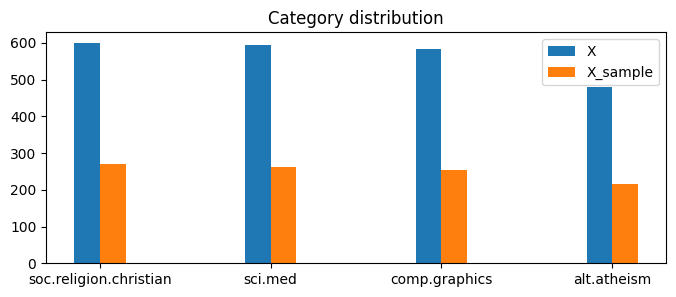

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

x_dis = X.category_name.value_counts().tolist()
x_sample_dis = X_sample.category_name.value_counts().tolist()

plt.figure(figsize=(8,3))
ind = np.arange(4)
width = 0.15

plt.bar(ind, x_dis , width, label='X')
plt.bar(ind + width, x_sample_dis, width, label='X_sample')

plt.xticks(ind + width / 2, ('soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'))

plt.title("Category distribution")
plt.legend(loc='best')
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [17]:
# find nonzero positions for 5th sample
np.nonzero(X_counts[4, 0:100].toarray())

(array([0, 0]), array([ 0, 37]))

In [18]:
# nonzero at (0, 0) and (0, 37)
print(count_vect.get_feature_names_out()[37])

01


The second 1 in the fifth record represents `01`.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

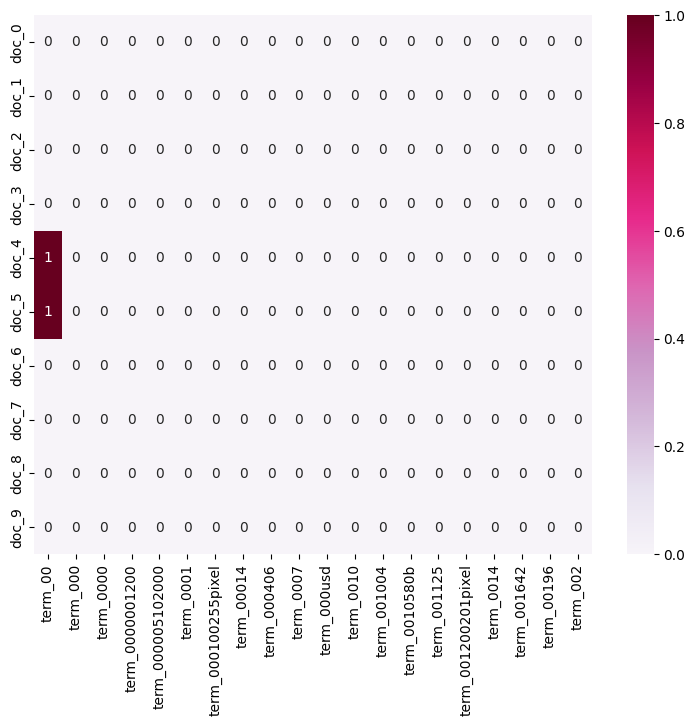

In [82]:
import seaborn as sns
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:10]]
plot_z = X_counts[0:10, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

From the figure above we know that term-document matrix is sparse. To plot it more efficiently, I first filter out stop words, which are common words that usually don't add much information to the text. Then, 20 most frequently used words are selected. From the 20 words, I select 20 files that contain most of these most frequently used words, creating a 20x20 matrix. If you want to keep stop words, the first 2 lines of the code can be commented out.

In [95]:
count_vect = CountVectorizer(stop_words='english')                           # filter out stop words
X_counts = count_vect.fit_transform(X.text)

ocur_times_word = np.sum(X_counts[:, :].toarray(), axis=0)                   # occuring times of words
sort_idx_word = np.argsort(ocur_times_word)                                  # sort by values, and store the indexes

ocur_times_file = np.sum(X_counts[:, sort_idx_word[-20:]].toarray(), axis=1) # occuring times of 20 most frequently used words for each file
sort_idx_file = np.argsort(ocur_times_file)                                  # sort by values, and store the indexes

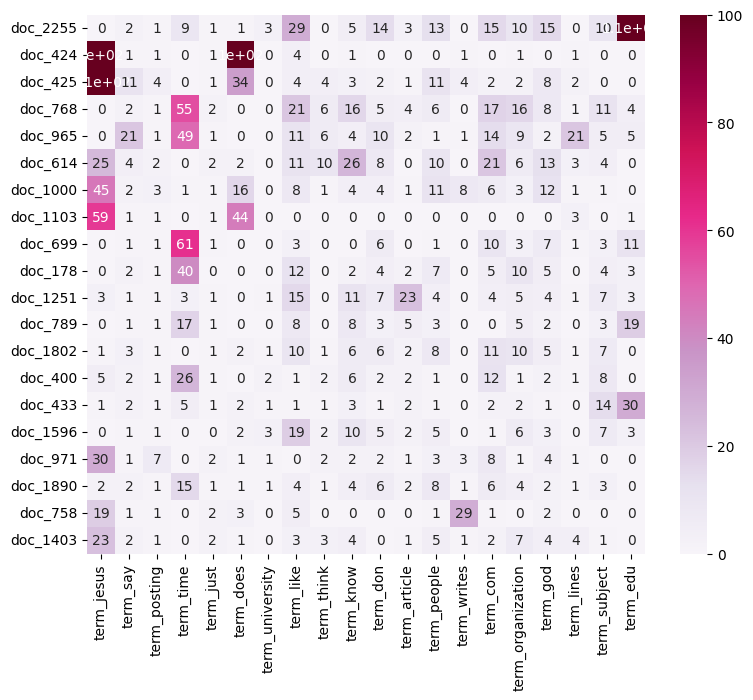

In [96]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort_idx_word[-20:]]]
plot_y = ["doc_"+ str(i) for i in np.array(X.index)[sort_idx_file[-20:]]]
plot_z = np.zeros((20, 20))
for i in range(20):         # (y, x)
    for j in range(20):
        plot_z[i, j] = X_counts[sort_idx_file[-(i+1)], sort_idx_word[-(j+1)]]
    
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=100, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

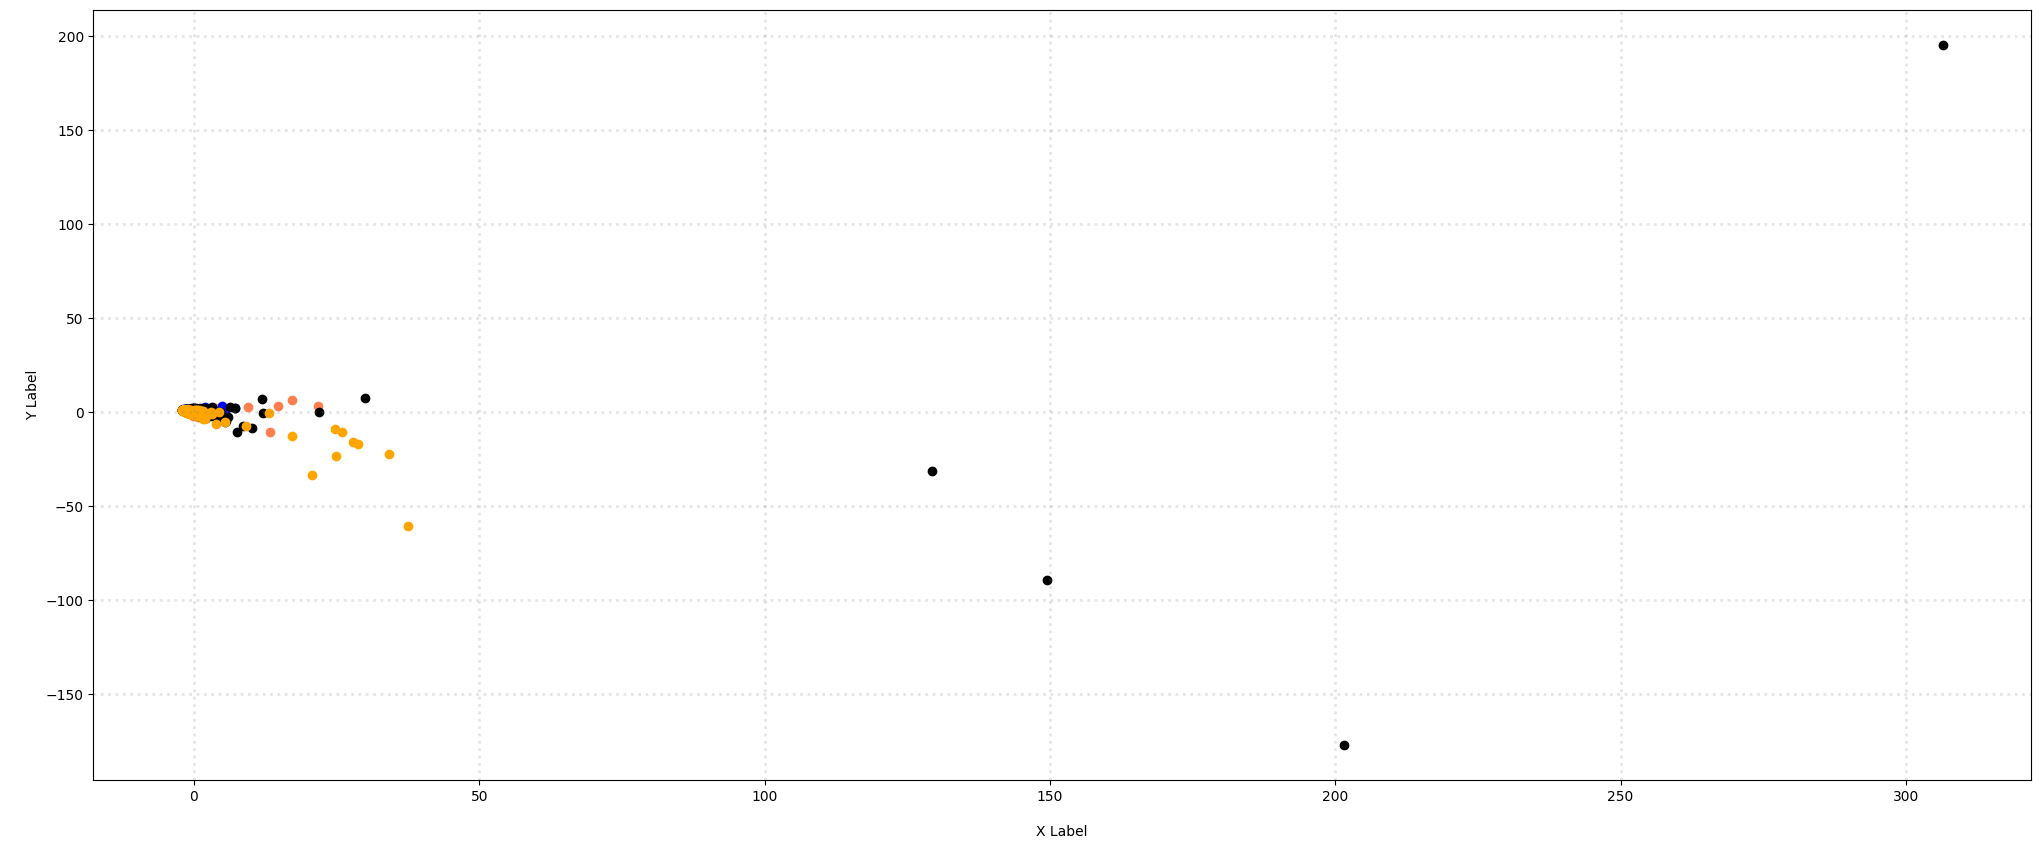

In [97]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()